# Lab1 
# Acquisition of data from inertial sensors and data fusion

This lab aims to show how to simply collect data from inertial sensors, display the acquired signals and apply data fusion algorithms to estimate the orientation of the object.

We will use your smartphones to collect data. All smartphones contain an Inertial Measurement Unit, consisting of a triaxial accelerometer and triaxial gyroscope. Most smartphone have also a triaxial magnetometer.

## Data acquisition from smartphone sensors

There are several apps for extracting data from smartphone sensors. We will use PhyPhox, which is an app developed from Aachen University for physics labs. Phyphox is available on Google Play Store or Apple App Store at the following address: 

- [PhyPhox on Google Play Store](https://play.google.com/store/apps/details?id=de.rwth_aachen.phyphox)
- [PhyPhox on Apple App Store](https://apps.apple.com/it/app/phyphox/id1127319693)

You can download the app by clicking on the above links or searching PhyPhox in your store.
Once you have downloaded the app, and you open it, the following screen appears:

<img src="PhyPhoxScreen_en.png" width="300"/>

As you can see, the initial screen contains some predefined physics experiment, that you can use to acquire data from the several sensors of the smartphone. For example there are experiments getting data from the accelerometer (*Acceleration with g*) or (*Acceleration without g*) or from the gyroscope (*Gyroscope (rotation rate)*). In my smartphone there is no magnetometer, so magnetometer experiment is grayed.

You can start acquiring data by clicking on one experiment (e.g. we can try *Acceleration with g*). The following screen appears:

<img src="PhyPhoxAccel_en.png" width="300"/>

To acquire data, you can click on the play button on the heading and you will see the data appearing on the graphs:

<img src="PhyPhoxAccelData_en.png" width="300"/>

You can stop the acquisition by clicking on the stop icon. Once you have acquired the data, you can export them by clicking on the three dots on the upper right corner and selecting *Export data*. A menu appears asking for the data format. You can use *CSV (Comma, decimal point)* and click OK. Once you click, the smartphone asks you the mean you want to use to share the file. You can use your preferred method. The easiest way is to use a cloud drive, like Google drive that you can also access from the computer. 

## Creating a custom experiment for Inertial data

Although there are many experiments, all the predefined experiment make use of data coming from a single sensor. In our case we need to observe simultaneously data from at least two sensors (accelerometer and gyroscope) and, if it is possible, also from the magnetometer.

Therefore, we need to create our own experiment. This can be done from the initial screen, clicking on the plus sign in the lower right corner.

After clicking you should choose *Add simple experiment*

In the next screen, you will be asked to add a title to your experiment. You can call it *IMU*. Then you should pecify the sensor rate. You can leave here 0 to use the fastest available. Finally, you should add the sensor you need in this experiment. You can select *Accelerometer*, *Gyroscope*, and, if available, *Magnetometer* and click *OK*

Once clicked, a new screen appears with the newly created experiment. You can see that it contains as many tabs as the number of sensors you selected (see Figure below).

<img src="PhyPhoxIMUScreen_en.png" width="300"/>

## Run your experiment

At this point you can start your experiment. You should start the acquisition and then move your smartphone in some predefined oriantation you can easily recognize. As an example, you can run the sequence reported in the figure below. The directions of the axes could vary depending on your smartphone. To acquire the data when you are ready to move the smartphone, you can use the *Timed run* feature of PhyPhox, by cliking on the three dots on the upper right corner and then selecting *Timed run*. There you can specify the delay of the acquisition start and the experiment duration.

<img src="Orientation.png" width="900"/>

## Display your measurement data

After the execution of your experiment, export the data to CSV format. You can see that PhyPhox generates a *zip* file. Change the name to *IMU.zip* and move it to the folder of this notebook. You can then decompress it in a proper folder *IMU*. The folder should contain as many files as the number of selected sensors. Each file contains 4 columns. The first column contains the time while the other columns contains the values of the x, y, and z axes, respectively. You can also observe that the acquisition has not started simultaneously on the sensors, but looking at the time column you can see a delay. In order to ease the reading, you can remove the raws corresponding of the firstly started sensors, until you reach the starting time of the last sensor.

You can now display your data, running the code below. The code loads the CSV files and display the data of each sensor on a different subplot.

Text(0.5, 0, 'Time [s]')

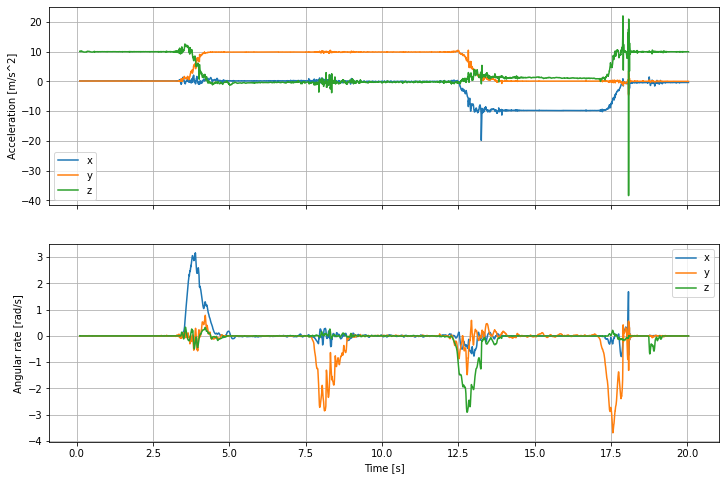

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# read first column from the Accelerometer file to get time, first line is discarded as it contains the column headings
time = np.genfromtxt('IMU/Accelerometer.csv', delimiter=',')[1:,0]
# read the data columns, first line is discarded as it contains the column headings
accel_data = np.genfromtxt('IMU/Accelerometer.csv', delimiter=',')[1:,1:]
gyro_data = np.genfromtxt('IMU/Gyroscope.csv', delimiter=',')[1:,1:]
# you can add the following line if you have magnetometer data
# mag_data = np.genfromtxt('IMU/Magnetometer.csv', delimiter=',')[1:,1:] 

# stacked plots with shared x values
fig, axs =plt.subplots(nrows=2,ncols=1, sharex=True) # you can use nrows=3 if you have the magnetometer
fig.set_figheight(8)
fig.set_figwidth(12)
acclines = axs[0].plot(time,accel_data)
acclines[0].set_label('x')
acclines[1].set_label('y')
acclines[2].set_label('z')
axs[0].legend()
axs[0].grid()
axs[0].set_ylabel('Acceleration [m/s^2]')
gyrlines = axs[1].plot(time,gyro_data)
gyrlines[0].set_label('x')
gyrlines[1].set_label('y')
gyrlines[2].set_label('z')
axs[1].legend()
axs[1].grid()
axs[1].set_ylabel('Angular rate [rad/s]')
# you can add the following line if you have magnetometer data
# axs[2].plot(time,mag_data)
# axs[2].grid()
# axs[2].set_ylabel('Magnetic field [uT]')
axs[1].set_xlabel('Time [s]') # Change index to 2 if there is magnetometer data

## Obtain orientation from sensor data

### Using accelerometer only

We can try to obtain orientation from the sensor data. Using the accelerometer only, we can get the roll angle $\theta$ and the pitch angle $\phi$ with:

$$\theta = \operatorname{arctan2}(a_y,a_z)$$
$$\phi = \operatorname{arctan2}\left(-a_x, \sqrt{a_y^2+a_z^2}\right)$$

Insert the above formulas in the code below and then run the code to display the angle estimation.

Text(0, 0.5, 'Orientation [°]')

<Figure size 432x288 with 0 Axes>

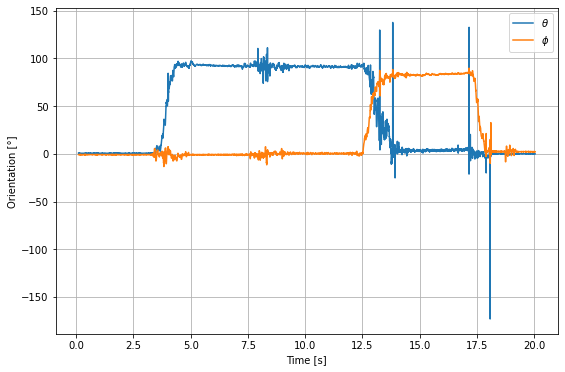

In [11]:
# normalize the acceleration measurements
accel_mag = np.sqrt(accel_data[:,0]**2 + accel_data[:,1]**2 + accel_data[:,2]**2)
av_mag = np.mean(accel_mag)
accel_data = accel_data/av_mag

# remove this 2 lines
theta = np.arctan2(accel_data[:,1],accel_data[:,2])
phi = np.arctan2(-accel_data[:,0],np.sqrt(accel_data[:,1]**2+accel_data[:,2]**2))
###

plt.figure()
plt.figure(figsize=(9,6))
line1, = plt.plot(time, theta*180/np.pi)
line2, = plt.plot(time, phi*180/np.pi)
line1.set_label(r'$\theta$')
line2.set_label(r'$\phi$')
plt.legend()
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Orientation [°]')

How do data look like? Are they smooth or noisy? If noisy, what is the noise source?

### Using gyroscope only

Similarly, we can get the angle estimation only by the gyroscope measurement, by integration (dead reckoning), using the following formulas:

$$\theta[n] = \sum_{i=0}^n {\omega_x[i]\cdot \Delta t}$$
$$\phi[n] = \sum_{i=0}^n {\omega_y[i]\cdot \Delta t}$$
$$\psi[n] = \sum_{i=0}^n {\omega_z[i]\cdot \Delta t}$$

where $\omega_x$, $\omega_y$ and $\omega_z$ are the gyroscope measurements corresponding to the $x$-, $y$, and $z$-axis, and $\Delta t$ is the sampling period.
Write the above formulas in the code below to get the angle estimation using gyroscope only.

Text(0, 0.5, 'Orientation [°]')

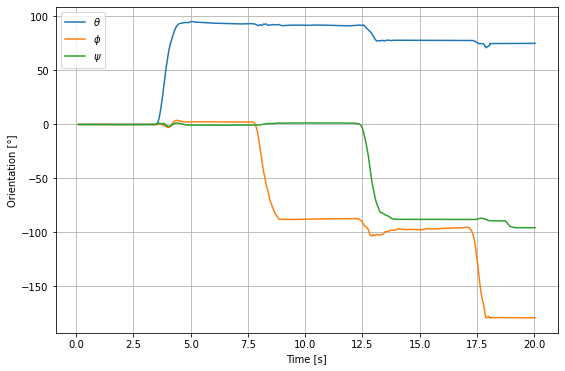

In [12]:
deltat = time[2] - time[1]

# remove the following 3 lines
theta = np.cumsum(gyro_data[:,0]*180/np.pi)*deltat
phi = np.cumsum(gyro_data[:,1]*180/np.pi)*deltat
psi = np.cumsum(gyro_data[:,2]*180/np.pi)*deltat
###

plt.figure(figsize=(9,6))
line1, = plt.plot(time,theta)
line2, = plt.plot(time,phi)
line3, = plt.plot(time,psi)
line1.set_label(r'$\theta$')
line2.set_label(r'$\phi$')
line3.set_label(r'$\psi$')
plt.legend()
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Orientation [°]')

How do angles look like? Are they smooth or noisy? How steady state values are compared with the angles obtained by the accelrometer?

### Complementary filter

Sensor fusion can be used to improve the angle estimation, by combining the estimations obtained by the accelerometer and the gyroscope. The easiest sensor fusion method is the complementary filter. Its scheme is reported in the following figure:

<img src="ComplementaryFilter.png" width="600px"/>

For the filters, we can use first-order filters. They have the following transfer functions:

<table>
    <tr>
        <td>Low-pass filter:</td><td>$H_{LP}(s)=\dfrac{1}{1+s\tau}$,</td>
        <td>Highpass filter:</td><td>$H_{HP}(s)=\dfrac{s\tau}{1+s\tau}$</td>
    </tr>
</table>

where $\tau$ is the time constant of the filter. Those transfer functions produce the following differential equations:

<table>
    <tr align=left>
        <td>Low-pass filter:</td><td>$\dot{y}(t)=-\dfrac{1}{\tau} \left(y(t)-x(t)\right)$</td>
    </tr>
    <tr>
        <td>Highpass filter:</td><td>$\dot{y}(t)=-\dfrac{1}{\tau} y(t) +\dot{x}(t)$</td>
    </tr>
</table>

The above equation can be discretized by using the backward integration method, substituting:

$$\dot{x}(t)=\dfrac{x(n\Delta t)-x((n-1)\Delta t)}{\Delta t}$$

where $\Delta t$ is the sampling period. This brings to the following *difference equations*:

<table>
    <tr align=left>
        <td>Low-pass filter:</td><td>$y[n]=\left(\dfrac{1}{1+\alpha}\right) \left( x[n] + \alpha y[n-1] \right)$</td>
    </tr>
    <tr>
        <td>Highpass filter:</td><td>$y[n]=\left(\dfrac{\alpha}{1+\alpha}\right) \left( x[n] - x[n-1] + \alpha y[n-1] \right) $</td>
    </tr>
</table>
where, $\alpha=\tau/\Delta t$.


After filtering, we can combine the estimates by the accelerometer and gyroscope with:

$$\hat{\phi} = \phi_{acc} + \gamma \cdot \phi_{gyro}$$

Complete the following code, to implement a complementary filter, fusing the accelerometer and gyroscope measurements:

Text(0, 0.5, 'Pitch angle $\\phi$ [°]')

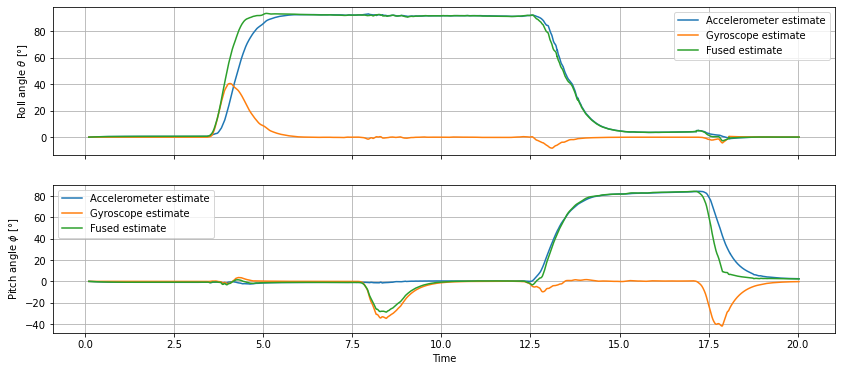

In [14]:
gamma = 0.8

# initialize the first value of the estimate using only the accelerometer
theta[0] = 0
phi[0] = 0
theta_acc = np.arctan2(accel_data[:,1],accel_data[:,2])
phi_acc = np.arctan2(-accel_data[:,0],np.sqrt(accel_data[:,1]**2+accel_data[:,2]**2))
theta_acc_f = np.zeros(len(time))
phi_acc_f = np.zeros(len(time))
theta_gyro = np.zeros(len(time))
phi_gyro = np.zeros(len(time))
theta_gyro_f = np.zeros(len(time))
phi_gyro_f = np.zeros(len(time))

accfilter_alpha = 200 # tau/deltat
gyrofilter_alpha = 200 # tau/deltat
for i in range(1,len(time)):
    # low-pass filter accelerometer data
    # first-order backward integration lowpass filter
    theta_acc_f[i] =  (1/(accfilter_alpha+1))*( accfilter_alpha * theta_acc_f[i-1] + theta_acc[i])
    phi_acc_f[i] =  (1/(accfilter_alpha+1))*( accfilter_alpha * phi_acc_f[i-1] + phi_acc[i])
    # first-order trapezoidal integration lowpass filter
    #theta_acc_f[i] = (1/(1+accfilter_alpha)) * ( theta_acc[i]+theta_acc[i-1] - (1-accfilter_alpha)*theta_acc_f[i-1] )
    
    # integrate gyroscope data
    theta_gyro[i] = theta_gyro[i-1]+gyro_data[i,0]*deltat
    phi_gyro[i] = phi_gyro[i-1]+gyro_data[i,1]*deltat
    
    # first-order backward integration highpass filter
    theta_gyro_f[i] =  (gyrofilter_alpha/(1+gyrofilter_alpha)) *(theta_gyro[i]-theta_gyro[i-1]+theta_gyro_f[i-1])
    phi_gyro_f[i] =  (gyrofilter_alpha/(1+gyrofilter_alpha)) *(phi_gyro[i]-phi_gyro[i-1]+phi_gyro_f[i-1])
    
    # first-order trapezoidal integration highpass filter
    #theta_gyro_f[i] =  (1/(1+gyrofilter_alpha)) * ( gyrofilter_alpha*(theta_gyro[i]-theta_gyro[i-1]) - (1-gyrofilter_alpha)*theta_gyro_f[i-1] )
    
    # fusing estimates
    theta[i] = (theta_acc_f[i]) + gamma*(theta_gyro_f[i])
    phi[i] = (phi_acc_f[i]) + gamma*(phi_gyro_f[i])

fig, axs = plt.subplots(nrows=2,ncols=1,sharex=True)
fig.set_figheight(6)
fig.set_figwidth(14)
line11, = axs[0].plot(time,theta_acc_f*180/np.pi)
line21, = axs[0].plot(time,theta_gyro_f*180/np.pi)
line31, = axs[0].plot(time,theta*180/np.pi)
line11.set_label('Accelerometer estimate')
line21.set_label('Gyroscope estimate')
line31.set_label('Fused estimate')
axs[0].legend()
axs[0].grid()
axs[0].set_ylabel(r'Roll angle $\theta$ [°]')

line12, = axs[1].plot(time,phi_acc_f*180/np.pi)
line22, = axs[1].plot(time,phi_gyro_f*180/np.pi)
line32, = axs[1].plot(time,phi*180/np.pi)
line12.set_label('Accelerometer estimate')
line22.set_label('Gyroscope estimate')
line32.set_label('Fused estimate')
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel('Time')
axs[1].set_ylabel(r'Pitch angle $\phi$ [°]')

### Data fusion with quaternions

A python library providing the implementation of several data fusion algorithms is available at the following link: [https://ahrs.readthedocs.io/en/latest/](https://ahrs.readthedocs.io/en/latest/). It mostly work with quaternions.
You can try the following functions:

[`ahrs.filters.Tilt`](https://ahrs.readthedocs.io/en/latest/filters/tilt.html): provides an estimation of the orientation quaternion using only accelerometer (and magneometer, in available);

[`ahrs.filters.AngularRate`](https://ahrs.readthedocs.io/en/latest/filters/angular.html): provides an estimation of the 
orientation quaternion using integration of the gyroscope data

[`ahrs.filters.Complementary`](https://ahrs.readthedocs.io/en/latest/filters/complementary.html): provides an estimation of the orientation quaternion by a complementary filter

[`ahrs.filters.Madgwick`](https://ahrs.readthedocs.io/en/latest/filters/complementary.html): provides an estimation of the orientation quaternion by the Gradient Descent method